In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # we only take the first two features.
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
# stratify=y ensures that the class distribution is preserved in both training and test sets

### 標準化

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # fit only on the training data
X_train_std = scaler.transform(X_train)  # transform training data
X_test_std = scaler.transform(X_test)  # transform test data using the same scaler

### モデル

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=42)
ppn.fit(X_train_std, y_train)  # fit the model on the standardized training data

Perceptron(eta0=0.1, max_iter=40, random_state=42)

In [5]:
y_pred = ppn.predict(X_test_std)  # predict on the standardized test data
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 7


In [6]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
"""
もしくは、
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))
"""

Accuracy: 0.844


"\nもしくは、\nprint('Accuracy: %.3f' % ppn.score(X_test_std, y_test))\n"

In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # マーカーとカラーマップの準備
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    # グリッドポイントの等高線をプロット
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)

    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラスごとに訓練データをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class{cl}',
                    edgecolor='black')
        
    # テストデータ点を目立たせる（点を○で表示）
    if test_idx:
        # すべてのテストデータ点をプロット
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', alpha=1.0, linewidths=1, marker='o', s=100, label='Test set', edgecolor='black')


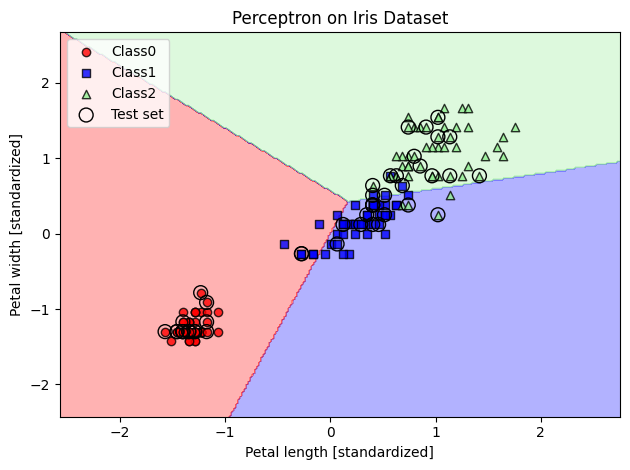

In [8]:
x_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=x_combined, y=y_combined, classifier=ppn, test_idx=range(105, 150))

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.title('Perceptron on Iris Dataset')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

完全な線形分離が不可能なデータセットでは、パーセプトロンアルゴリズムは決して収束しない。一般の実務のデータ解析で推奨されない理由。